<a href="https://colab.research.google.com/github/Tales313/P6_Machine_Learning/blob/master/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 
import pandas as pandas
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# WINE
url_wine = "https://raw.githubusercontent.com/Tales313/P6_Machine_Learning/master/wine.data"
col_names_wine = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']
feature_cols_wine = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

# BALANCE-SCALE 
url_balance_scale = "https://raw.githubusercontent.com/Tales313/P6_Machine_Learning/master/balance-scale.data"
col_names_balance_scale = ['label', 'x1', 'x2', 'x3', 'x4']
feature_cols_balance_scale = ['x1', 'x2', 'x3', 'x4']

# ABALONE
url_abalone = "https://raw.githubusercontent.com/Tales313/P6_Machine_Learning/master/abalone.data"
col_names_abalone = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
feature_cols_abalone = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
#url_abalone = "https://raw.githubusercontent.com/Tales313/P6_Machine_Learning/master/ecoli.data"
#col_names_abalone = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']#, 'x9', 'x10', 'x11', 'x12']
#feature_cols_abalone = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']#, 'x9', 'x10', 'x11', 'x12']

raw_dataset_wine = pandas.read_csv(url_wine ,header=None, names=col_names_wine) 
raw_dataset_balance_scale = pandas.read_csv(url_balance_scale, header=None, names=col_names_balance_scale) 
raw_dataset_abalone = pandas.read_csv(url_abalone, header=None, names=col_names_abalone)

In [151]:
wine_results = {
    'tree': [],
    'knn5': [],
    'knn10': [],
    'mlp1': [],
    'mlp2': [],
} 

wine_arvore_acertos = []
wine_arvore_erros = []
wine_knn5_acertos = []
wine_knn5_erros = []
wine_knn10_acertos = []
wine_knn10_erros = []
wine_mlp1_acertos = []
wine_mlp1_erros = []
wine_mlp2_acertos = []
wine_mlp2_erros = []

wine_x = raw_dataset_wine[feature_cols_wine]
wine_y = raw_dataset_wine.label

for i in range(10):
  x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(wine_x, wine_y, test_size=0.2, random_state=None, stratify=wine_y) 

  #Arvore
  wine_tree = tree.DecisionTreeClassifier()
  wine_tree = wine_tree.fit(x_train_wine, y_train_wine)
  wine_result = wine_tree.predict(x_test_wine)
  acc = metrics.accuracy_score(y_test_wine, wine_result)
  wine_results['tree'].append(round(acc * 100))
  wine_arvore_acertos.append(wine_results['tree'][i])
  wine_arvore_erros.append(100 - wine_arvore_acertos[i])

  # KNN 5
  wine_knn5= KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='brute')
  wine_knn5.fit(x_train_wine, y_train_wine)
  wine_result = wine_knn5.predict(x_test_wine)
  acc = metrics.accuracy_score(y_test_wine, wine_result)
  wine_results['knn5'].append(round(acc * 100))
  wine_knn5_acertos.append(wine_results['knn5'][i])
  wine_knn5_erros.append(100 - wine_knn5_acertos[i])

  # KNN 10
  wine_knn10 = KNeighborsClassifier(n_neighbors=10)
  wine_knn10.fit(x_train_wine, y_train_wine)
  wine_result = wine_knn10.predict(x_test_wine)
  acc = metrics.accuracy_score(y_test_wine, wine_result)
  wine_results['knn10'].append(round(acc * 100))
  wine_knn10_acertos.append(wine_results['knn10'][i])
  wine_knn10_erros.append(100 - wine_knn10_acertos[i])

  # MLP 1
  wine_mlp1 = MLPClassifier(hidden_layer_sizes=(4,2), activation='identity',max_iter=3000)
  wine_mlp1.fit(x_train_wine, y_train_wine)
  wine_result = wine_mlp1.predict(x_test_wine)
  acc = metrics.accuracy_score(y_test_wine, wine_result)
  wine_results['mlp1'].append(round(acc * 100))
  wine_mlp1_acertos.append(wine_results['mlp1'][i])
  wine_mlp1_erros.append(100 - wine_mlp1_acertos[i])

  # MLP 2
  wine_mlp2 = MLPClassifier(hidden_layer_sizes=(8,6), activation='logistic',max_iter=1000)
  wine_mlp2.fit(x_train_wine, y_train_wine)
  wine_result = wine_mlp2.predict(x_test_wine)
  acc = metrics.accuracy_score(y_test_wine, wine_result)
  wine_results['mlp2'].append(round(acc * 100))
  wine_mlp2_acertos.append(wine_results['mlp2'][i])
  wine_mlp2_erros.append(100 - wine_mlp2_acertos[i])

print(wine_results)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

{'tree': [94.0, 97.0, 92.0, 97.0, 92.0, 97.0, 86.0, 86.0, 92.0, 97.0], 'knn5': [75.0, 83.0, 81.0, 83.0, 81.0, 86.0, 75.0, 78.0, 83.0, 75.0], 'knn10': [72.0, 72.0, 75.0, 83.0, 61.0, 69.0, 67.0, 69.0, 81.0, 69.0], 'mlp1': [33.0, 86.0, 67.0, 94.0, 61.0, 33.0, 61.0, 19.0, 94.0, 89.0], 'mlp2': [72.0, 97.0, 94.0, 39.0, 39.0, 92.0, 81.0, 89.0, 89.0, 97.0]}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [76]:
balance_scale_results = {
    'tree': [],
    'knn5': [],
    'knn10': [],
    'mlp1': [],
    'mlp2': [],
} 

balance_arvore_acertos = []
balance_arvore_erros = []
balance_knn5_acertos = []
balance_knn5_erros = []
balance_knn10_acertos = []
balance_knn10_erros = []
balance_mlp1_acertos = []
balance_mlp1_erros = []
balance_mlp2_acertos = []
balance_mlp2_erros = []

balance_scale_x = raw_dataset_balance_scale[feature_cols_balance_scale]
balance_scale_y = raw_dataset_balance_scale.label

for i in range(10):
  x_train_balance_scale, x_test_balance_scale, y_train_balance_scale, y_test_balance_scale = train_test_split(balance_scale_x, balance_scale_y, test_size=0.2, random_state=None, stratify=balance_scale_y) 

  # Arvore
  balance_scale_tree = tree.DecisionTreeClassifier()
  balance_scale_tree = balance_scale_tree.fit(x_train_balance_scale,y_train_balance_scale)
  balance_scale_result = balance_scale_tree.predict(x_test_balance_scale)
  acc = metrics.accuracy_score(y_test_balance_scale, balance_scale_result)
  balance_scale_results['tree'].append(round(acc * 100))
  balance_arvore_acertos.append(balance_scale_results['tree'][i])
  balance_arvore_erros.append(100 - balance_arvore_acertos[i])

  # KNN 5
  balance_scale_knn5= KNeighborsClassifier(n_neighbors=5)
  balance_scale_knn5.fit(x_train_balance_scale, y_train_balance_scale)
  balance_scale_result = balance_scale_knn5.predict(x_test_balance_scale)
  acc = metrics.accuracy_score(y_test_balance_scale, balance_scale_result)
  balance_scale_results['knn5'].append(round(acc * 100))
  balance_knn5_acertos.append(balance_scale_results['knn5'][i])
  balance_knn5_erros.append(100 - balance_knn5_acertos[i])

  # KNN 10
  balance_scale_knn10 = KNeighborsClassifier(n_neighbors=10)
  balance_scale_knn10.fit(x_train_balance_scale,y_train_balance_scale)
  balance_scale_result = balance_scale_knn10.predict(x_test_balance_scale)
  acc = metrics.accuracy_score(y_test_balance_scale, balance_scale_result)
  balance_scale_results['knn10'].append(round(acc * 100))
  balance_knn10_acertos.append(balance_scale_results['knn10'][i])
  balance_knn10_erros.append(100 - balance_knn10_acertos[i])

  # MLP 1
  balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(10,5), activation='tanh',max_iter=1000)
  balance_scale_mlp1.fit(x_train_balance_scale,y_train_balance_scale )
  balance_scale_result = balance_scale_mlp1.predict(x_test_balance_scale)
  acc = metrics.accuracy_score(y_test_balance_scale, balance_scale_result)
  balance_scale_results['mlp1'].append(round(acc* 100))
  balance_mlp1_acertos.append(balance_scale_results['mlp1'][i])
  balance_mlp1_erros.append(100 - balance_mlp1_acertos[i])

  # MLP 2
  balance_scale_mlp2 = MLPClassifier(hidden_layer_sizes=(4,2), activation='tanh',max_iter=1000)
  balance_scale_mlp2.fit(x_train_balance_scale,y_train_balance_scale)
  balance_scale_result = balance_scale_mlp2.predict(x_test_balance_scale)
  acc = metrics.accuracy_score(y_test_balance_scale, balance_scale_result)
  balance_scale_results['mlp2'].append(round(acc * 100))
  balance_mlp2_acertos.append(balance_scale_results['mlp2'][i])
  balance_mlp2_erros.append(100 - balance_mlp2_acertos[i])

print(balance_scale_results)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

{'tree': [81.0, 81.0, 74.0, 83.0, 74.0, 77.0, 74.0, 78.0, 81.0, 78.0], 'knn5': [86.0, 84.0, 83.0, 84.0, 83.0, 83.0, 82.0, 85.0, 85.0, 87.0], 'knn10': [89.0, 87.0, 86.0, 90.0, 88.0, 89.0, 87.0, 87.0, 87.0, 89.0], 'mlp1': [99.0, 97.0, 91.0, 98.0, 99.0, 98.0, 99.0, 94.0, 96.0, 98.0], 'mlp2': [93.0, 90.0, 92.0, 94.0, 99.0, 90.0, 91.0, 93.0, 46.0, 100.0]}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [129]:
abalone_results = {
    'tree': [],
    'knn5': [],
    'knn10': [],
    'mlp1': [],
    'mlp2': [],
} 

abalone_arvore_acertos = []
abalone_arvore_erros = []
abalone_knn5_acertos = []
abalone_knn5_erros = []
abalone_knn10_acertos = []
abalone_knn10_erros = []
abalone_mlp1_acertos = []
abalone_mlp1_erros = []
abalone_mlp2_acertos = []
abalone_mlp2_erros = []

abalone_x = raw_dataset_abalone[feature_cols_abalone]
abalone_y = raw_dataset_abalone.label

for i in range(10):
  x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=None, stratify=abalone_y) 

  # Arvore
  abalone_tree = tree.DecisionTreeClassifier(criterion="entropy")
  abalone_tree = abalone_tree.fit(x_train_abalone,y_train_abalone)
  abalone_result = abalone_tree.predict(x_test_abalone)
  acc = metrics.accuracy_score(y_test_abalone, abalone_result)
  abalone_results['tree'].append(round(acc * 100))
  abalone_arvore_acertos.append(abalone_results['tree'][i])
  abalone_arvore_erros.append(100 - abalone_arvore_acertos[i])

  # KNN 5
  abalone_knn5= KNeighborsClassifier(n_neighbors=5)
  abalone_knn5.fit(x_train_abalone, y_train_abalone)
  abalone_result = abalone_knn5.predict(x_test_abalone)
  acc = metrics.accuracy_score(y_test_abalone, abalone_result)
  abalone_results['knn5'].append(round(acc * 100))
  abalone_knn5_acertos.append(abalone_results['knn5'][i])
  abalone_knn5_erros.append(100 - abalone_knn5_acertos[i])

  # KNN 10
  abalone_knn10 = KNeighborsClassifier(n_neighbors=10)
  abalone_knn10.fit(x_train_abalone,y_train_abalone)
  abalone_result = abalone_knn10.predict(x_test_abalone)
  acc = metrics.accuracy_score(y_test_abalone, abalone_result)
  abalone_results['knn10'].append(round(acc * 100))
  abalone_knn10_acertos.append(abalone_results['knn10'][i])
  abalone_knn10_erros.append(100 - abalone_knn10_acertos[i])

  # MLP 1
  abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(8,6), activation='tanh',max_iter=600)
  abalone_mlp1.fit(x_train_abalone,y_train_abalone)
  abalone_result = abalone_mlp1.predict(x_test_abalone)
  acc = metrics.accuracy_score(y_test_abalone, abalone_result)
  abalone_results['mlp1'].append(round(acc * 100))
  abalone_mlp1_acertos.append(abalone_results['mlp1'][i])
  abalone_mlp1_erros.append(100 - abalone_mlp1_acertos[i])

  # MLP 2
  abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(4,2), activation='tanh',max_iter=400)
  abalone_mlp2.fit(x_train_abalone,y_train_abalone)
  abalone_result = abalone_mlp2.predict(x_test_abalone)
  acc = metrics.accuracy_score(y_test_abalone, abalone_result)
  abalone_results['mlp2'].append(round(acc * 100))
  abalone_mlp2_acertos.append(abalone_results['mlp2'][i])
  abalone_mlp2_erros.append(100 - abalone_mlp2_acertos[i])

print(abalone_results)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': [49.0, 47.0, 51.0, 51.0, 48.0, 51.0, 49.0, 51.0, 50.0, 49.0], 'knn5': [53.0, 52.0, 51.0, 55.0, 54.0, 54.0, 54.0, 51.0, 51.0, 56.0], 'knn10': [53.0, 53.0, 53.0, 56.0, 52.0, 53.0, 53.0, 51.0, 54.0, 53.0], 'mlp1': [54.0, 58.0, 54.0, 55.0, 53.0, 56.0, 55.0, 53.0, 56.0, 56.0], 'mlp2': [54.0, 56.0, 54.0, 58.0, 54.0, 54.0, 54.0, 54.0, 53.0, 55.0]}


In [171]:
pandas.DataFrame.from_dict(wine_results, orient='index')

,0,1,2,3,4,5,6,7,8,9
tree,94.0,97.0,92.0,97.0,92.0,97.0,86.0,86.0,92.0,97.0
knn5,75.0,83.0,81.0,83.0,81.0,86.0,75.0,78.0,83.0,75.0
knn10,72.0,72.0,75.0,83.0,61.0,69.0,67.0,69.0,81.0,69.0
mlp1,33.0,86.0,67.0,94.0,61.0,33.0,61.0,19.0,94.0,89.0
mlp2,72.0,97.0,94.0,39.0,39.0,92.0,81.0,89.0,89.0,97.0


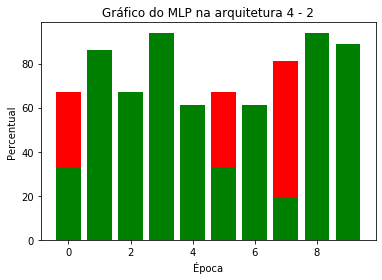

In [172]:
successMLP1 = [x for x in range(len(wine_mlp1_acertos))]
failureMLP1 = [x for x in range(len(wine_mlp1_erros))]
plt.bar(failureMLP1, wine_mlp1_erros, color='red')
plt.bar(successMLP1, wine_mlp1_acertos, color='green')
plt.xlabel('Época')
plt.ylabel('Percentual')
plt.title('Gráfico do MLP na arquitetura 4 - 2')
plt.show()

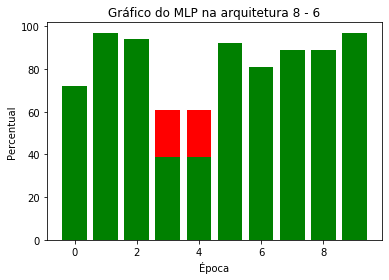

In [173]:
successMLP2 = [x for x in range(len(wine_mlp2_acertos))]
failureMLP2 = [x for x in range(len(wine_mlp2_erros))]
plt.bar(failureMLP2, wine_mlp2_erros, color='red')
plt.bar(successMLP2, wine_mlp2_acertos, color='green')
plt.xlabel('Época')
plt.ylabel('Percentual')
plt.title('Gráfico do MLP na arquitetura 8 - 6')
plt.show()

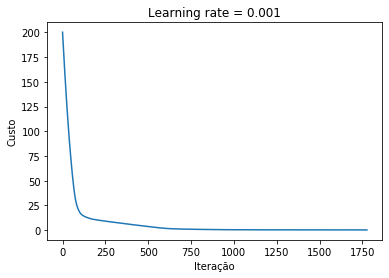

In [174]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate = " + str(0.001))
plt.plot(wine_mlp1.loss_curve_)

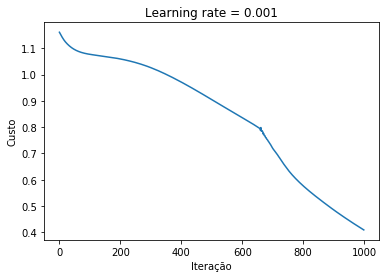

In [175]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate = " + str(0.001))
plt.plot(wine_mlp2.loss_curve_)

In [157]:
pandas.DataFrame.from_dict(balance_scale_results, orient='index')

,0,1,2,3,4,5,6,7,8,9
tree,81.0,81.0,74.0,83.0,74.0,77.0,74.0,78.0,81.0,78.0
knn5,86.0,84.0,83.0,84.0,83.0,83.0,82.0,85.0,85.0,87.0
knn10,89.0,87.0,86.0,90.0,88.0,89.0,87.0,87.0,87.0,89.0
mlp1,99.0,97.0,91.0,98.0,99.0,98.0,99.0,94.0,96.0,98.0
mlp2,93.0,90.0,92.0,94.0,99.0,90.0,91.0,93.0,46.0,100.0


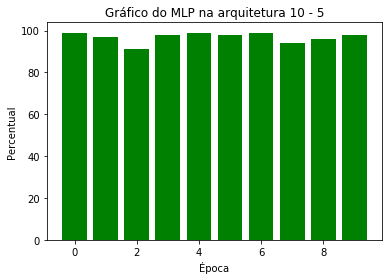

In [176]:
successMLP1 = [x for x in range(len(balance_mlp1_acertos))]
failureMLP1 = [x for x in range(len(balance_mlp1_erros))]
plt.bar(failureMLP1, balance_mlp1_erros, color='red')
plt.bar(successMLP1, balance_mlp1_acertos, color='green')
plt.xlabel('Época')
plt.ylabel('Percentual')
plt.title('Gráfico do MLP na arquitetura 10 - 5')
plt.show()

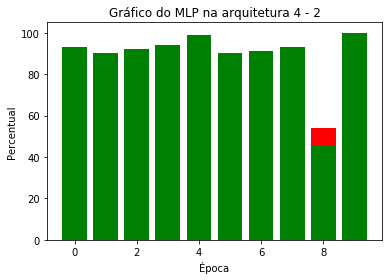

In [159]:
successMLP2 = [x for x in range(len(balance_mlp2_acertos))]
failureMLP2 = [x for x in range(len(balance_mlp2_erros))]
plt.bar(failureMLP2, balance_mlp2_erros, color='red')
plt.bar(successMLP2, balance_mlp2_acertos, color='green')
plt.xlabel('Época')
plt.ylabel('Percentual')
plt.title('Gráfico do MLP na arquitetura 4 - 2')
plt.show()

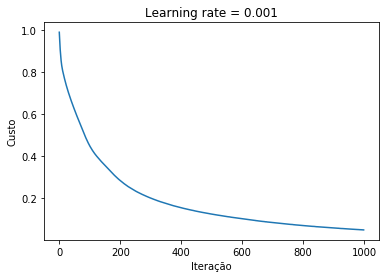

In [160]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate = " + str(0.001))
plt.plot(balance_scale_mlp1.loss_curve_)

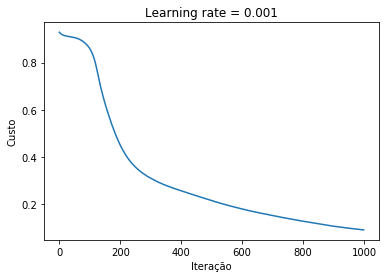

In [161]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate = " + str(0.001))
plt.plot(balance_scale_mlp2.loss_curve_)

In [163]:
pandas.DataFrame.from_dict(abalone_results, orient='index')

,0,1,2,3,4,5,6,7,8,9
tree,49.0,47.0,51.0,51.0,48.0,51.0,49.0,51.0,50.0,49.0
knn5,53.0,52.0,51.0,55.0,54.0,54.0,54.0,51.0,51.0,56.0
knn10,53.0,53.0,53.0,56.0,52.0,53.0,53.0,51.0,54.0,53.0
mlp1,54.0,58.0,54.0,55.0,53.0,56.0,55.0,53.0,56.0,56.0
mlp2,54.0,56.0,54.0,58.0,54.0,54.0,54.0,54.0,53.0,55.0


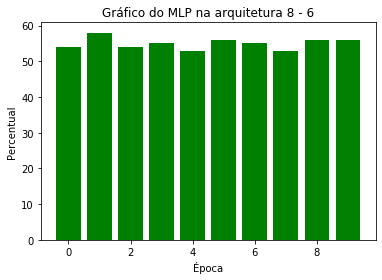

In [177]:
successMLP1 = [x for x in range(len(abalone_mlp1_acertos))]
failureMLP1 = [x for x in range(len(abalone_mlp1_erros))]
plt.bar(failureMLP1, abalone_mlp1_erros, color='red')
plt.bar(successMLP1, abalone_mlp1_acertos, color='green')
plt.xlabel('Época')
plt.ylabel('Percentual')
plt.title('Gráfico do MLP na arquitetura 8 - 6')
plt.show()

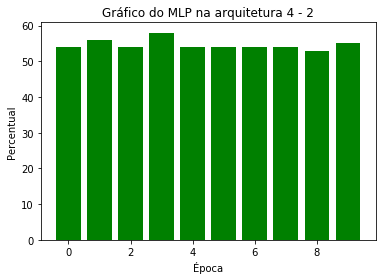

In [178]:
successMLP2 = [x for x in range(len(abalone_mlp2_acertos))]
failureMLP2 = [x for x in range(len(abalone_mlp2_erros))]
plt.bar(failureMLP2, abalone_mlp2_erros, color='red')
plt.bar(successMLP2, abalone_mlp2_acertos, color='green')
plt.xlabel('Época')
plt.ylabel('Percentual')
plt.title('Gráfico do MLP na arquitetura 4 - 2')
plt.show()

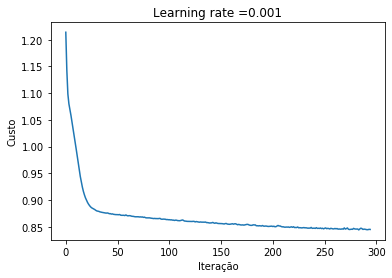

In [179]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp1.loss_curve_)

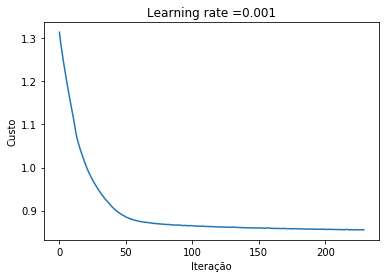

In [180]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp2.loss_curve_)